### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
#import pandas_datareader as pdr
#key="dc49a04679fa9c165e329950a30f816ea97f2c7f"

In [3]:
#df = pdr.get_data_tiingo('TSLA', api_key=key)

In [4]:
#df.to_csv('TSLA.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('TSLA.csv')

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,TSLA,2018-01-10 00:00:00+00:00,334.80,337.00,330.00,332.20,4236168,22.320000,22.466667,22.000000,22.146667,63542520,0.0,1.0
1,1,TSLA,2018-01-11 00:00:00+00:00,337.95,344.81,333.26,335.24,6619082,22.530000,22.987333,22.217333,22.349333,99286230,0.0,1.0
2,2,TSLA,2018-01-12 00:00:00+00:00,336.22,340.41,333.67,338.63,4805025,22.414667,22.694000,22.244667,22.575333,72075375,0.0,1.0
3,3,TSLA,2018-01-16 00:00:00+00:00,340.06,345.00,334.80,337.54,6392397,22.670667,23.000000,22.320000,22.502667,95885955,0.0,1.0
4,4,TSLA,2018-01-17 00:00:00+00:00,347.16,349.00,339.75,340.47,7062337,23.144000,23.266667,22.650000,22.698000,105935055,0.0,1.0


In [8]:
df.shape

(1257, 15)

In [9]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,1252,TSLA,2022-12-30 00:00:00+00:00,123.18,124.48,119.7500,119.95,157777339,123.18,124.48,119.7500,119.95,157777339,0.0,1.0
1253,1253,TSLA,2023-01-03 00:00:00+00:00,108.10,118.80,104.6400,118.47,231402818,108.10,118.80,104.6400,118.47,231402818,0.0,1.0
1254,1254,TSLA,2023-01-04 00:00:00+00:00,113.64,114.59,107.5200,109.11,180388976,113.64,114.59,107.5200,109.11,180388976,0.0,1.0
1255,1255,TSLA,2023-01-05 00:00:00+00:00,110.34,111.75,107.1601,110.51,157986324,110.34,111.75,107.1601,110.51,157986324,0.0,1.0
1256,1256,TSLA,2023-01-06 00:00:00+00:00,113.06,114.39,101.8100,103.00,220911051,113.06,114.39,101.8100,103.00,220911051,0.0,1.0


In [10]:
df1=df.reset_index()['close']

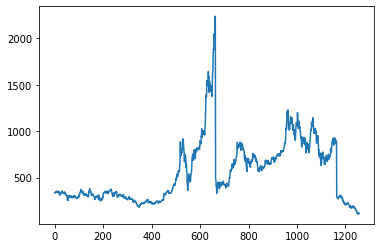

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       334.80
1       337.95
2       336.22
3       340.06
4       347.16
         ...  
1252    123.18
1253    108.10
1254    113.64
1255    110.34
1256    113.06
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.10639946]
 [0.10787788]
 [0.10706592]
 ...
 [0.00260015]
 [0.00105132]
 [0.00232793]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.10639946],
       [0.10787788],
       [0.10706592],
       [0.10886819],
       [0.1122005 ],
       [0.11098491],
       [0.11354282],
       [0.1142656 ],
       [0.11484289],
       [0.11160444],
       [0.10773238],
       [0.11017765],
       [0.11331284],
       [0.11157159],
       [0.11555629],
       [0.11318142],
       [0.11060005],
       [0.10561566],
       [0.1060099 ],
       [0.11118673],
       [0.09721447],
       [0.09495694],
       [0.09744914],
       [0.101171  ],
       [0.10053739],
       [0.10605684],
       [0.1067233 ],
       [0.10638538],
       [0.10569545],
       [0.11173586],
       [0.11449558],
       [0.11701593],
       [0.11399808],
       [0.11027621],
       [0.10458311],
       [0.10654964],
       [0.10571891],
       [0.10330181],
       [0.1052261 ],
       [0.10372422],
       [0.10281839],
       [0.11142609],
       [0.10970361],
       [0.10256494],
       [0.10208152],
       [0.10008683],
       [0.09643067],
       [0.095

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 281ms/step - loss: 0.0220 - val_loss: 0.0106
Epoch 2/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0103 - val_loss: 0.0065
Epoch 3/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 4/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 5/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 6/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0058 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 154ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0046 - val_lo

12/12 [==============================] - 2s 190ms/step - loss: 9.4519e-04 - val_loss: 0.0014
Epoch 82/100
12/12 [==============================] - 2s 190ms/step - loss: 9.7759e-04 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 2s 162ms/step - loss: 9.6837e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 88/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 89/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 90/100
12/12 [==============================] - 2s 178ms/step - loss: 9.3988e

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.2'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

601.8888492250818

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

788.4081004488735

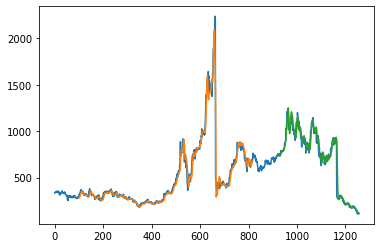

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.3809119282847957,
 0.37729800765024757,
 0.37571163729378354,
 0.3669772135263887,
 0.35746837819444766,
 0.36667683570741316,
 0.36758266256776095,
 0.0882219041137681,
 0.0844765681834182,
 0.08294182526459062,
 0.07960012202848896,
 0.07861920071339731,
 0.07934667824372846,
 0.0760847628657921,
 0.07806068570623989,
 0.08241616408138361,
 0.08502569638373267,
 0.08991622274892638,
 0.09214089597071318,
 0.08637270316570062,
 0.09129138995142327,
 0.09182643794147327,
 0.09163870180461361,
 0.09432332856170653,
 0.09416375284537584,
 0.0904418839321334,
 0.08471123835449273,
 0.07848778541759557,
 0.07880693685025697,
 0.08205946542135029,
 0.08434515288761646,
 0.0751460821814939,
 0.07375683476873254,
 0.0630324079506254,
 0.06633656395935512,
 0.06228615680660832,
 0.061028324689648694,
 0.05396005913688311,
 0.05390843169924671,
 0.050876493088963456,
 0.05122380494215381,
 0.05332644967498182,
 0.04547438575082721,
 0.05221411306408842,
 0.05260835895149367,
 0.0534766385844

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0021553]
101
1 day input [0.37729801 0.37571164 0.36697721 0.35746838 0.36667684 0.36758266
 0.0882219  0.08447657 0.08294183 0.07960012 0.0786192  0.07934668
 0.07608476 0.07806069 0.08241616 0.0850257  0.08991622 0.0921409
 0.0863727  0.09129139 0.09182644 0.0916387  0.09432333 0.09416375
 0.09044188 0.08471124 0.07848779 0.07880694 0.08205947 0.08434515
 0.07514608 0.07375683 0.06303241 0.06633656 0.06228616 0.06102832
 0.05396006 0.05390843 0.05087649 0.0512238  0.05332645 0.04547439
 0.05221411 0.05260836 0.05347664 0.04654918 0.04990965 0.04841246
 0.05365264 0.05469692 0.05490813 0.05651796 0.05605801 0.05618943
 0.0501631  0.05031798 0.04663835 0.0417619  0.03904912 0.03261446
 0.0387769  0.04124094 0.03888485 0.04051346 0.03699341 0.03523338
 0.03383475 0.02805247 0.02900993 0.03524746 0.03508788 0.03511604
 0.03413512 0.04064487 0.04064487 0.04071997 0.03489545 0.03366109
 0.0309483  0.0306667  0.0332997  0.02802901 0.02480464 0.02285687
 0.0232652  0.01977331 0.01960435 0

10 day output [[0.00079018]]
11 day input [0.0786192  0.07934668 0.07608476 0.07806069 0.08241616 0.0850257
 0.08991622 0.0921409  0.0863727  0.09129139 0.09182644 0.0916387
 0.09432333 0.09416375 0.09044188 0.08471124 0.07848779 0.07880694
 0.08205947 0.08434515 0.07514608 0.07375683 0.06303241 0.06633656
 0.06228616 0.06102832 0.05396006 0.05390843 0.05087649 0.0512238
 0.05332645 0.04547439 0.05221411 0.05260836 0.05347664 0.04654918
 0.04990965 0.04841246 0.05365264 0.05469692 0.05490813 0.05651796
 0.05605801 0.05618943 0.0501631  0.05031798 0.04663835 0.0417619
 0.03904912 0.03261446 0.0387769  0.04124094 0.03888485 0.04051346
 0.03699341 0.03523338 0.03383475 0.02805247 0.02900993 0.03524746
 0.03508788 0.03511604 0.03413512 0.04064487 0.04064487 0.04071997
 0.03489545 0.03366109 0.0309483  0.0306667  0.0332997  0.02802901
 0.02480464 0.02285687 0.0232652  0.01977331 0.01960435 0.01393941
 0.01383146 0.00809612 0.00706357 0.00046934 0.00216366 0.00643935
 0.00707765 0.         0

20 day output [[0.00023856]]
21 day input [0.09182644 0.0916387  0.09432333 0.09416375 0.09044188 0.08471124
 0.07848779 0.07880694 0.08205947 0.08434515 0.07514608 0.07375683
 0.06303241 0.06633656 0.06228616 0.06102832 0.05396006 0.05390843
 0.05087649 0.0512238  0.05332645 0.04547439 0.05221411 0.05260836
 0.05347664 0.04654918 0.04990965 0.04841246 0.05365264 0.05469692
 0.05490813 0.05651796 0.05605801 0.05618943 0.0501631  0.05031798
 0.04663835 0.0417619  0.03904912 0.03261446 0.0387769  0.04124094
 0.03888485 0.04051346 0.03699341 0.03523338 0.03383475 0.02805247
 0.02900993 0.03524746 0.03508788 0.03511604 0.03413512 0.04064487
 0.04064487 0.04071997 0.03489545 0.03366109 0.0309483  0.0306667
 0.0332997  0.02802901 0.02480464 0.02285687 0.0232652  0.01977331
 0.01960435 0.01393941 0.01383146 0.00809612 0.00706357 0.00046934
 0.00216366 0.00643935 0.00707765 0.         0.00260015 0.00105132
 0.00232793 0.0021553  0.00180191 0.00157322 0.00141746 0.00129894
 0.00119782 0.0011052

30 day output [[-0.00033392]]
31 day input [ 7.51460822e-02  7.37568348e-02  6.30324080e-02  6.63365640e-02
  6.22861568e-02  6.10283247e-02  5.39600591e-02  5.39084317e-02
  5.08764931e-02  5.12238049e-02  5.33264497e-02  4.54743858e-02
  5.22141131e-02  5.26083590e-02  5.34766386e-02  4.65491751e-02
  4.99096520e-02  4.84124563e-02  5.36526412e-02  5.46969235e-02
  5.49081266e-02  5.65179640e-02  5.60580105e-02  5.61894258e-02
  5.01630958e-02  5.03179781e-02  4.66383498e-02  4.17619036e-02
  3.90491165e-02  3.26144604e-02  3.87768991e-02  4.12409359e-02
  3.88848473e-02  4.05134583e-02  3.69934058e-02  3.52333795e-02
  3.38347453e-02  2.80524723e-02  2.90099265e-02  3.52474597e-02
  3.50878840e-02  3.51160444e-02  3.41351231e-02  4.06448736e-02
  4.06448736e-02  4.07199681e-02  3.48954544e-02  3.36610893e-02
  3.09483022e-02  3.06666980e-02  3.32996973e-02  2.80290052e-02
  2.48046371e-02  2.28568747e-02  2.32652008e-02  1.97733086e-02
  1.96043461e-02  1.39394082e-02  1.38314599e-0

35 day output [[-0.00062147]]
36 day input [ 6.10283247e-02  5.39600591e-02  5.39084317e-02  5.08764931e-02
  5.12238049e-02  5.33264497e-02  4.54743858e-02  5.22141131e-02
  5.26083590e-02  5.34766386e-02  4.65491751e-02  4.99096520e-02
  4.84124563e-02  5.36526412e-02  5.46969235e-02  5.49081266e-02
  5.65179640e-02  5.60580105e-02  5.61894258e-02  5.01630958e-02
  5.03179781e-02  4.66383498e-02  4.17619036e-02  3.90491165e-02
  3.26144604e-02  3.87768991e-02  4.12409359e-02  3.88848473e-02
  4.05134583e-02  3.69934058e-02  3.52333795e-02  3.38347453e-02
  2.80524723e-02  2.90099265e-02  3.52474597e-02  3.50878840e-02
  3.51160444e-02  3.41351231e-02  4.06448736e-02  4.06448736e-02
  4.07199681e-02  3.48954544e-02  3.36610893e-02  3.09483022e-02
  3.06666980e-02  3.32996973e-02  2.80290052e-02  2.48046371e-02
  2.28568747e-02  2.32652008e-02  1.97733086e-02  1.96043461e-02
  1.39394082e-02  1.38314599e-02  8.09612090e-03  7.06357215e-03
  4.69340342e-04  2.16365898e-03  6.43934949e-0

40 day output [[-0.0008926]]
41 day input [ 5.33264497e-02  4.54743858e-02  5.22141131e-02  5.26083590e-02
  5.34766386e-02  4.65491751e-02  4.99096520e-02  4.84124563e-02
  5.36526412e-02  5.46969235e-02  5.49081266e-02  5.65179640e-02
  5.60580105e-02  5.61894258e-02  5.01630958e-02  5.03179781e-02
  4.66383498e-02  4.17619036e-02  3.90491165e-02  3.26144604e-02
  3.87768991e-02  4.12409359e-02  3.88848473e-02  4.05134583e-02
  3.69934058e-02  3.52333795e-02  3.38347453e-02  2.80524723e-02
  2.90099265e-02  3.52474597e-02  3.50878840e-02  3.51160444e-02
  3.41351231e-02  4.06448736e-02  4.06448736e-02  4.07199681e-02
  3.48954544e-02  3.36610893e-02  3.09483022e-02  3.06666980e-02
  3.32996973e-02  2.80290052e-02  2.48046371e-02  2.28568747e-02
  2.32652008e-02  1.97733086e-02  1.96043461e-02  1.39394082e-02
  1.38314599e-02  8.09612090e-03  7.06357215e-03  4.69340342e-04
  2.16365898e-03  6.43934949e-03  7.07765236e-03  0.00000000e+00
  2.60014550e-03  1.05132237e-03  2.32792810e-03

45 day output [[-0.00114351]]
46 day input [ 4.65491751e-02  4.99096520e-02  4.84124563e-02  5.36526412e-02
  5.46969235e-02  5.49081266e-02  5.65179640e-02  5.60580105e-02
  5.61894258e-02  5.01630958e-02  5.03179781e-02  4.66383498e-02
  4.17619036e-02  3.90491165e-02  3.26144604e-02  3.87768991e-02
  4.12409359e-02  3.88848473e-02  4.05134583e-02  3.69934058e-02
  3.52333795e-02  3.38347453e-02  2.80524723e-02  2.90099265e-02
  3.52474597e-02  3.50878840e-02  3.51160444e-02  3.41351231e-02
  4.06448736e-02  4.06448736e-02  4.07199681e-02  3.48954544e-02
  3.36610893e-02  3.09483022e-02  3.06666980e-02  3.32996973e-02
  2.80290052e-02  2.48046371e-02  2.28568747e-02  2.32652008e-02
  1.97733086e-02  1.96043461e-02  1.39394082e-02  1.38314599e-02
  8.09612090e-03  7.06357215e-03  4.69340342e-04  2.16365898e-03
  6.43934949e-03  7.07765236e-03  0.00000000e+00  2.60014550e-03
  1.05132237e-03  2.32792810e-03  2.15530396e-03  1.80191454e-03
  1.57321896e-03  1.41746178e-03  1.29893608e-0

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

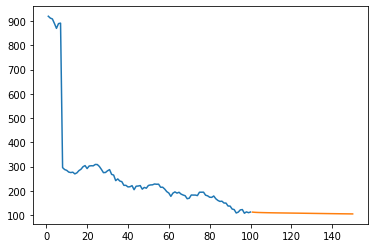

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

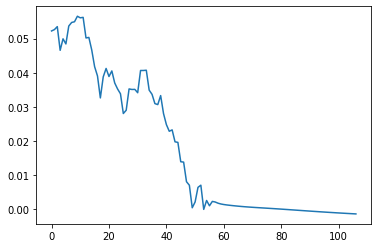

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

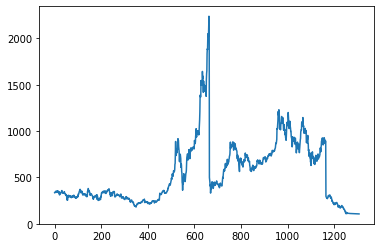

In [48]:
plt.plot(df3)